Goal : estimate interesting tape recall needs for HL-LHC:

 - tape writing for
   - raw data only
   - raw data + tier0 output products
 - tape writing at FNAL for raw
 - tape recall to do raw in a month
 - tape recall to do aod in a month


In [34]:
seconds_per_year = 6.5e6
hlt_output_rate = 7500
months_of_datataking = 8
seconds_per_month = 3600*24*30
MBs_per_drive = 1200. # see below for explaination

size_mb_raw = 7.4
size_mb_all_analysis = 2.0
# currently alca + skims are about the same as AOD, assume it stays that way
size_mb_other = 2.0 

usa_fraction = 0.4

In [11]:
def tape_rate(size_per_event_to_tape,months):
    return seconds_per_year * hlt_output_rate * size_per_event_to_tape / (months * seconds_per_month)

In [36]:
# Compute the tape writing rate for CERN for just the RAW data
   
total_MBs_RAW= tape_rate(size_mb_raw, months_of_datataking)
print total_MBs_RAW // 1000, 'GB/second, or', total_MBs_RAW // MBs_per_drive, "drives"

17.0 GB/second, or 14.0 drives


In [37]:
# Compute the tape writing rate for CERN for the RAW data and derived data

total_MBs_RAW_plus_DER= tape_rate(size_mb_raw+size_mb_all_analysis+size_mb_other, months_of_datataking) 
print total_MBs_RAW_plus_DER // 1000, 'GB/second, or', total_MBs_RAW_plus_DER // MBs_per_drive, "drives"

26.0 GB/second, or 22.0 drives


In [38]:
# Compute the tape writing raw for FNAL for the RAW data

us_MBs_RAW = tape_rate(usa_fraction*size_mb_raw, months_of_datataking) 
print us_MBs_RAW // 1000, 'GB/second', us_MBs_RAW // MBs_per_drive, "drives"

6.0 GB/second 5.0 drives


In [39]:
# Compute the tape reading rate to recall the RAW in a month
total_MBs_recall_RAW = tape_rate(size_mb_raw,1) 
print total_MBs_recall_RAW // 1000, 'GB/second', total_MBs_recall_RAW // MBs_per_drive, "drives"

139.0 GB/second 115.0 drives


In [40]:
#Compute the tape reading rate to recall the AOD in a month
total_MBs_recall_AOD = tape_rate(size_mb_all_analysis*0.9,1) 
print total_MBs_recall_AOD // 1000, 'GB/second', total_MBs_recall_AOD // MBs_per_drive, "drives"


33.0 GB/second 28.0 drives


I was worried about relative improvement of tape capacity vs tape read speed. From Wikipedia, the capacity and uncompressed read rates are

| Generation |    Capacity (GB) |  Read speed (MB/sec) |
| --- | ---------- | ------------ | 
| LTO-1 |   100  |   20  |
| LTO-2 |   200  |   40 |
| LTO-3 |   400  |   80 |
| LTO-4 |   800  |   120 |
| LTO-5 |  1500  |   140 |
| LTO-6 |  2500  |   160 |
| LTO-7 |  6000  |   300 |
| LTO-8 | 12000  |   360 |
| LTO-9 | 24000  |   708  |
| LTO-10| 48000  |   1100 |






Then we can consider how many tape drives we need. Two factors to consider
a) what generation of LTO we might be at - lets say LTO-11, which is not terribly conservative especially given that the LTO projections may not be met. So this means a maximum read rate of something like 1500 MB/second. (extrapolating from LTO-10)

b) what is the efficienty achievable? Say 80%? 

So 1.2GB/second per drive

Information on tape drives

FNAL migrating to LTO8 tapes and IBM TS4500 tape libraries

LTO - LTO- generation 8 - 750 MB/second/drive [assumes some compression rate] - roadmap to gen 12 includes 12x increase in tape capacity. Released December 2017

Per https://en.wikipedia.org/wiki/Linear_Tape-Open gen-10 is 2750 MB/second recall (eg, about 4x LT08) - transfer speeds in gen 11-12 are not yet estimated
But per https://www.itjungle.com/2017/10/25/lto-consortium-pushes-roadmap-gen-12/ , guesses 20% increase in speed per generation (which matches the gain between LTO-7 and LTO-8)

Per https://www.itjungle.com/2014/09/15/tfh091514-story05/, gen 10 is 2020 (sounds more realistic that this is the timeline for LTO gen 9 at this point... (my naive opinion))

Last tech roadmap from Bernd - slide 15 of https://indico.cern.ch/event/658060/contributions/2889027/attachments/1622791/2583013/tech_market_BPS_Mar2018_v9pptx.pdf

https://indico.cern.ch/event/637013/contributions/2739332/attachments/1542528/2419646/OutlookForArchivalStorageAtCERN_MichaelDavis.pdf

is partly interesting as it shows the expectations for LT0-8 read rates were not met.
Should we use compressed or uncompressed figures? (2.5x different)

Moving generations means replacing old tape if you want the gains. - backwards compatibility is limited in current LTO products.

So what can we optimistically conclude about tape read/write capabilities in 2026? Seems we can assume LTO-11 which may give something between 360*1.2*1.2*1.2 and 360*2*2*2 (MB/second)

I make a different extrapolation above.. clearly the factor of 2 each generation is no longer happening, so is not realistic to consider.

In [25]:
tape_speed_min = 360*1.2*1.2*1.2
tape_speed_max = 360*2*2*2
print tape_speed_min /1000,"up to", tape_speed_max /1000., 'GB/second'

0.62208 up to 2.88 GB/second


(0, 12.657828164100646)

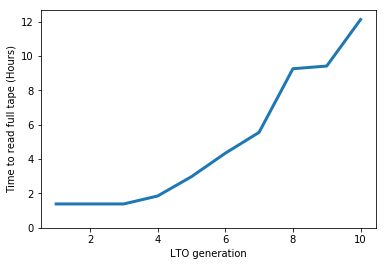

In [21]:
# so lets plot the ratio
import numpy
%matplotlib inline
import pylab
ltoGen = numpy.arange(1,11)
cap= numpy.array([100,200,400,800,1500,2500,6000,12000,24000,48000],dtype=numpy.float32)
read=numpy.array([20,40,80,120,140,160,300,360,708,1100],dtype=numpy.float32)

hoursToRead=(1./3600.)*cap/(0.001*read)

pylab.plot(ltoGen,hoursToRead,linewidth=3)
pylab.xlabel('LTO generation')
pylab.ylabel('Time to read full tape (Hours)')
pylab.ylim(ymin=0)